In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the dataset(s)
dataset_path = './datasets/fm_1.csv'

# load dataset information
df_spec = pd.read_csv(dataset_path, nrows=10, header=None, index_col=0, names=['info'])
df_spec = df_spec.drop(['Version', 'DateTime', 'TimestampOffset', 'TriggerPosition', 'FastFrameID', 'IDInFastFrame', 'TotalInFastFrame'], axis=0).astype('int')

# load data
df = pd.read_csv(dataset_path, skiprows=10, names=['I', 'Q'])
df = df.loc[~df['I'].isin(['TimestampOffset', 'TriggerPosition', 'FastFrameID', 'IDInFastFrame', 'TotalInFastFrame'])]
df['I'] = df['I'].astype('float')

In [3]:
df_spec

,info
SamplingFrequency,28000000
NumberSamples,1024
NumberRecords,5023


In [4]:
# sanity check
print('Number of expected samples:', df_spec.loc['NumberSamples']['info'] * df_spec.loc['NumberRecords']['info'])
print('Actual number of samples:', df.shape[0])

Number of expected samples: 5143552
Actual number of samples: 5143552


In [5]:
# remove extraneous samples
# df = df.iloc[-(df_spec.loc['NumberSamples']['info'] * df_spec.loc['NumberRecords']['info']):].reset_index(drop=True)

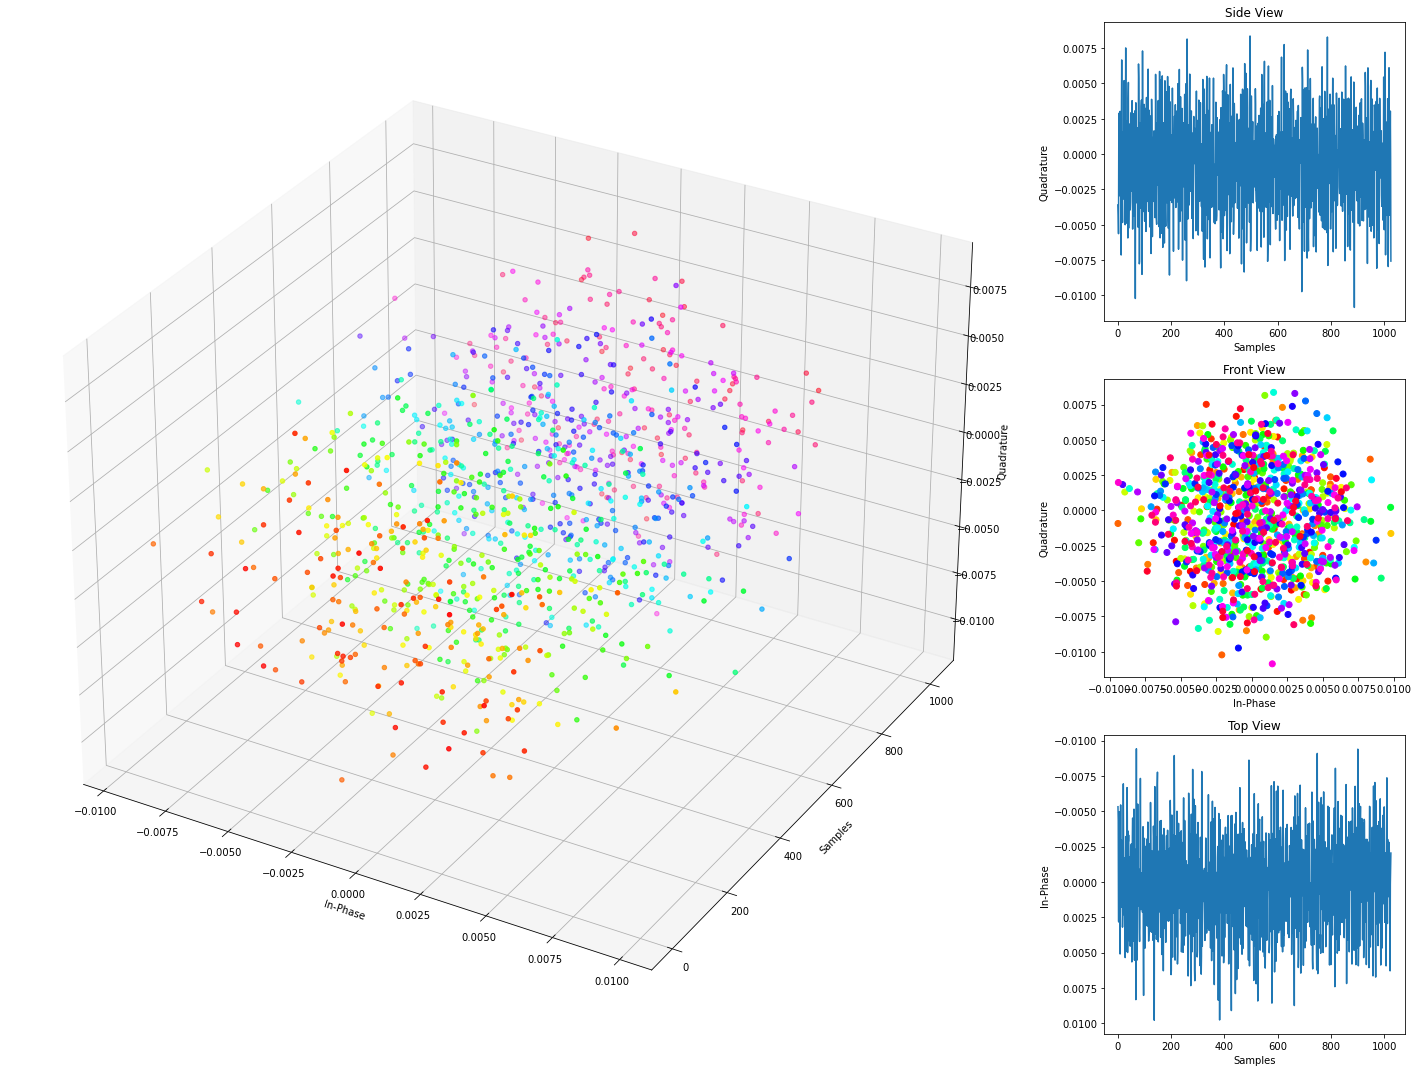

In [6]:
# plot a record sample
fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(3, 4)
ax = fig.add_subplot(gs[:3, :3], projection='3d')

x = df.iloc[:df_spec.loc['NumberSamples']['info']]['I'].values
z = df.iloc[:df_spec.loc['NumberSamples']['info']]['Q'].values
y = np.arange(1, df_spec.loc['NumberSamples']['info']+1)

ax.scatter(x, y, z, c=y, cmap='hsv')
ax.set_xlabel('In-Phase')
ax.set_ylabel('Samples')
ax.set_zlabel('Quadrature')

# fig4 = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(gs[0, 3])
ax1.plot(y, z)
ax1.set_xlabel('Samples')
ax1.set_ylabel('Quadrature')
ax1.set_title('Side View')

ax2 = fig.add_subplot(gs[1, 3])
ax2.scatter(x, z, c=y, cmap='hsv')
ax2.set_xlabel('In-Phase')
ax2.set_ylabel('Quadrature')
ax2.set_title('Front View')

ax3 = fig.add_subplot(gs[2, 3])
ax3.plot(y, x)
ax3.set_xlabel('Samples')
ax3.set_ylabel('In-Phase')
ax3.set_title('Top View')
ax3.invert_yaxis()


plt.tight_layout()
plt.show()

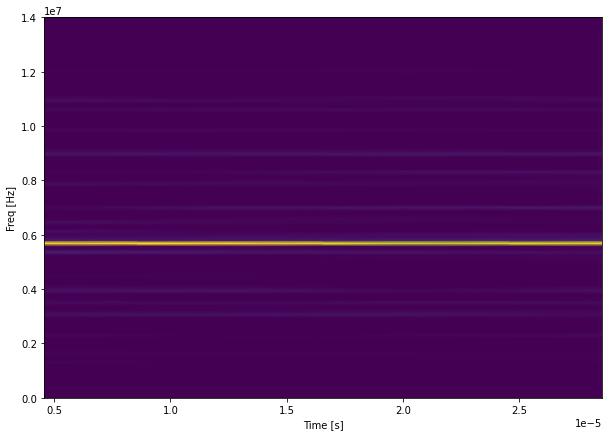

In [14]:
from scipy.signal import spectrogram

test = spectrogram(df.iloc[:df_spec.loc['NumberSamples']['info']]['I'].values, fs=df_spec.loc['SamplingFrequency']['info'])

plt.figure(figsize=(10, 7))
plt.pcolormesh(test[1], test[0], test[2], shading='gouraud')
plt.ylabel('Freq [Hz]')
plt.xlabel('Time [s]')
plt.show()

In [13]:
help(plt.pcolormesh)

Help on function pcolormesh in module matplotlib.pyplot:

pcolormesh(*args, alpha=None, norm=None, cmap=None, vmin=None, vmax=None, shading=None, antialiased=False, data=None, **kwargs)
    Create a pseudocolor plot with a non-regular rectangular grid.
    
    Call signature::
    
        pcolormesh([X, Y,] C, **kwargs)
    
    *X* and *Y* can be used to specify the corners of the quadrilaterals.
    
    .. hint::
    
       `~.Axes.pcolormesh` is similar to `~.Axes.pcolor`. It is much faster
       and preferred in most cases. For a detailed discussion on the
       differences see :ref:`Differences between pcolor() and pcolormesh()
       <differences-pcolor-pcolormesh>`.
    
    Parameters
    ----------
    C : 2D array-like
        The color-mapped values.
    
    X, Y : array-like, optional
        The coordinates of the corners of quadrilaterals of a pcolormesh::
    
            (X[i+1, j], Y[i+1, j])       (X[i+1, j+1], Y[i+1, j+1])
                                  +--